In [47]:
'''
Problem Statement:
 -> The client is an Insurance company that has provided Health Insurance to its customers now 
    they need your help in building a model to predict whether the policyholders (customers) from past year 
    will also be interested in Vehicle Insurance provided by the company.
-> predict Requirement : whether the customer would be interested in Vehicle insurance, 
-> Input Parameters - gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) 
-> Target - Response (Custermer is interested to buy  the vehicle insurance or not), 1 - Intrested , 0 - Not Intrested
'''

'\nProblem Statement:\n -> The client is an Insurance company that has provided Health Insurance to its customers now \n    they need your help in building a model to predict whether the policyholders (customers) from past year \n    will also be interested in Vehicle Insurance provided by the company.\n-> predict Requirement : whether the customer would be interested in Vehicle insurance, \n-> Input Parameters - gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) \n-> Target - Response (Custermer is interested to buy  the vehicle insurance or not), 1 - Intrested , 0 - Not Intrested\n'

In [48]:
# Importing required Libraryies
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [49]:
# Importing Visualization Lib
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Data preprocessing  and pipline lib
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import joblib

In [51]:
# Modle Selection Lib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
# Read the data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission_iA3afxn.csv')


In [53]:
train.shape,test.shape,submission.shape

((381109, 12), (127037, 11), (127037, 2))

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Exploratory Data Analysis (EDA) 

<Axes: title={'center': 'Pie chart of Percentage for target (Response)'}, ylabel='count'>

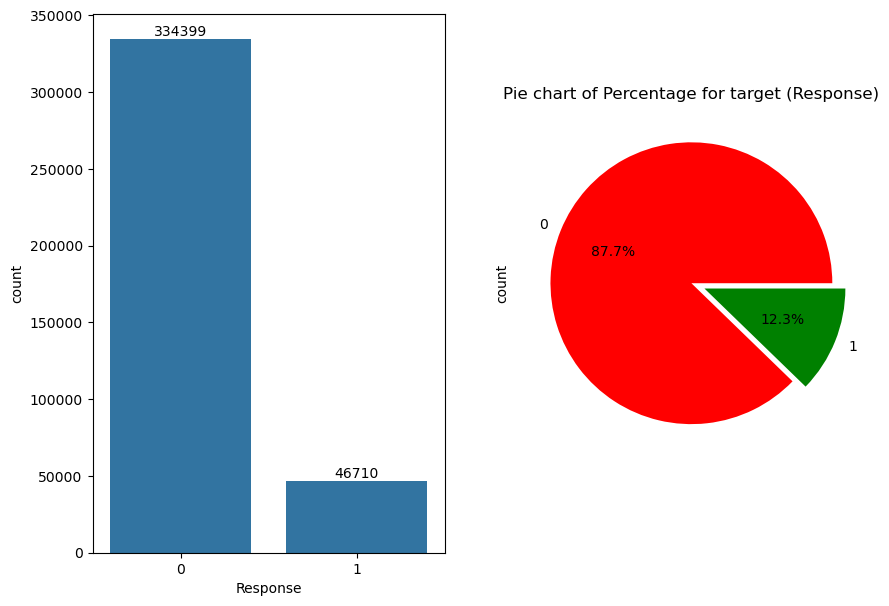

In [55]:
# Response (Target variable)
plt.figure(figsize = (5,5))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Response', data=train)
ax.bar_label(ax.containers[0])

plt.subplot(1, 2, 2)
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['red','green'], figsize = (10,7),explode = [0,0.1],title = "Pie chart of Percentage for target (Response)")

# Based on the 

In [56]:
# As per the above plot we could see the problem of imbalance binary classification problem

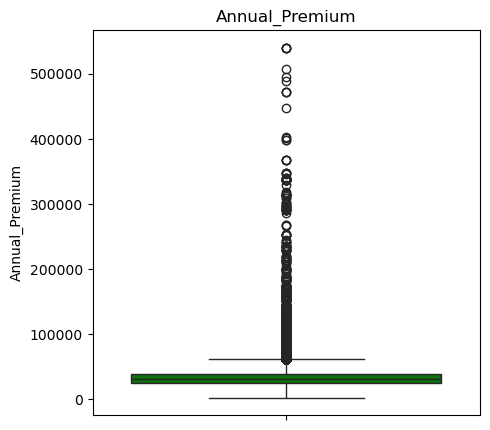

In [57]:
# Annual_Premium
plt.figure(figsize=(5,5))
sns.boxplot(train['Annual_Premium'],color='green')
plt.title("Annual_Premium")
plt.show()


In [58]:
# From the below boxplot we could see there is huge outliers in the variable

<Axes: ylabel='Age'>

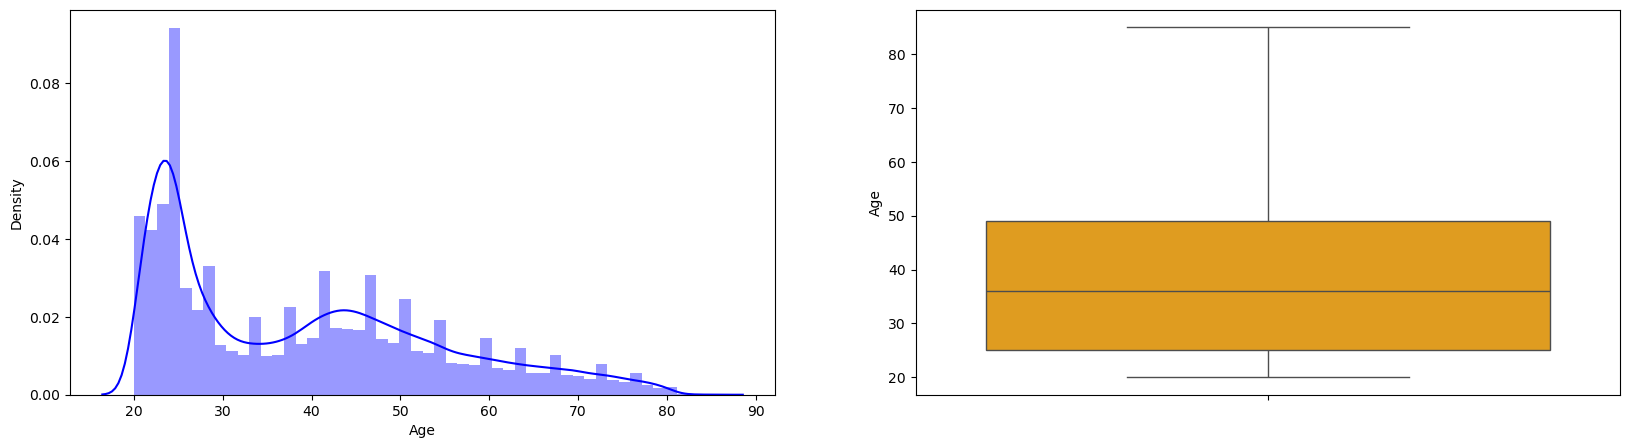

In [59]:
# Age
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.distplot(train['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(train['Age'],ax = axx[1],color='Orange')

In [60]:
# Count of the indivisuals with age 24 are greater in the dataset
# As per the plot age column has right skewness

Text(0.5, 1.0, 'Vintage')

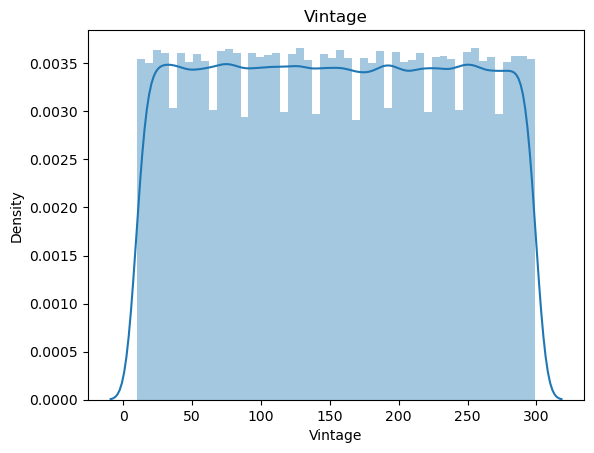

In [61]:
# Vintage
sns.distplot(train['Vintage'])
train['Vintage'].plot
plt.title("Vintage")

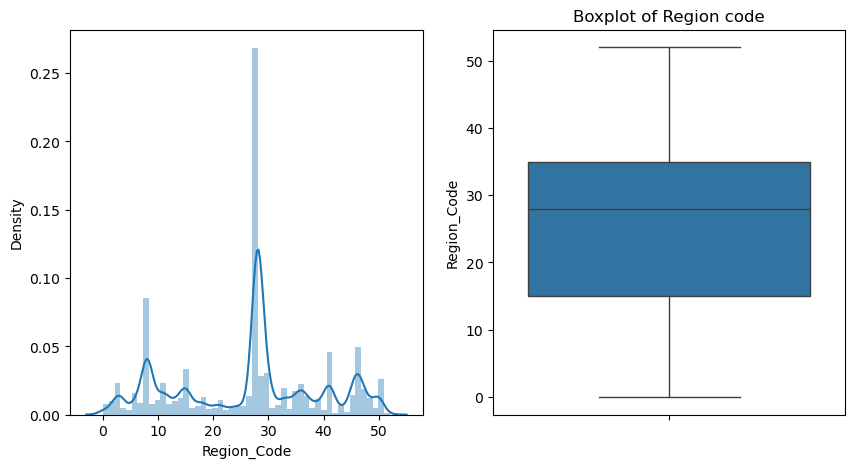

In [62]:
# Region_Code
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(train['Region_Code'])
train['Region_Code'].plot
plt.subplot(1,2,2)
plt.title("Region_Code")
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()

In [63]:
# The region code 28 is highest as compared to the other ones
# Based on box plot there is no outliers in the data

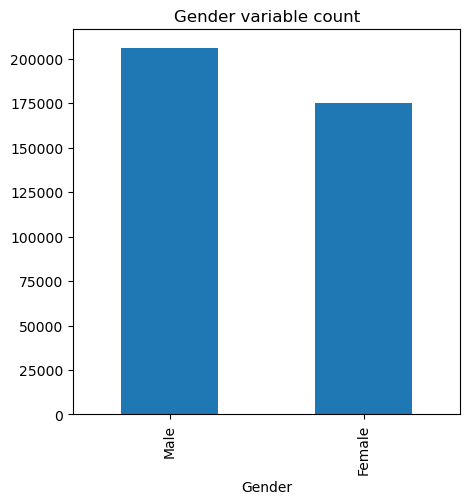

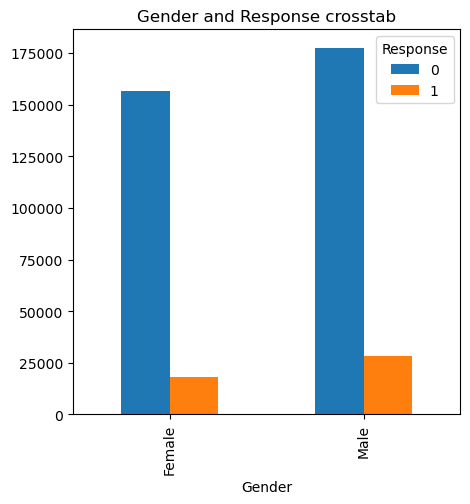

In [64]:
# Gender
plt.figure(figsize = (5,5))
train["Gender"].value_counts().plot.bar()
plt.title("Gender variable count")
DL = pd.crosstab(train['Gender'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Gender and Response crosstab")
plt.show()

In [65]:
# Gender variable count almost equally distributed
# Male category is  greater than that of female and chances of buying the insurance is also  high.

<Axes: >

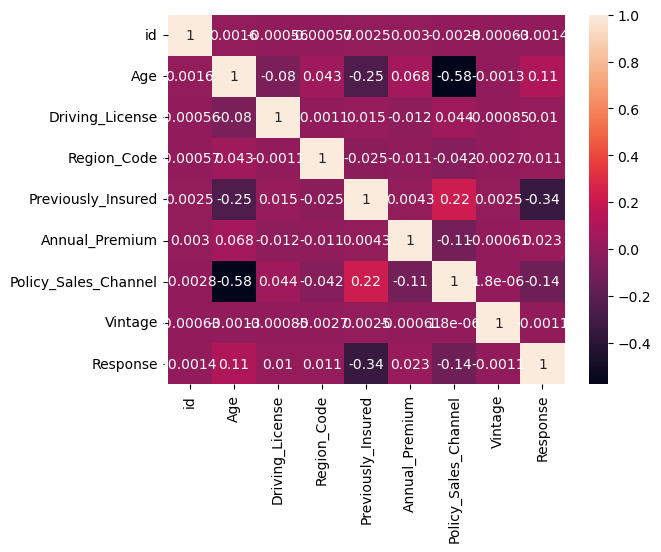

In [66]:
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot = True)

In [67]:
# From the correlation plot we observe that policy sales channel has Strong Negative  correlation with Age variable, 
# This may be the indication of multicollinearity.
# This indicates that as Age increases, there is a tendency for customers to use different sales channels compared to younger customers.
# Example: Older customers might prefer specific offline or direct sales channels
# Negative Correlation with Previously_Insured (-0.34): Uninsured individuals are more likely to respond.

# Data Cleaning

In [68]:
# Finding the null values from all the columns
train.isna().sum()


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [69]:
# There is no null value in any of the columns. 

In [70]:
train.duplicated().sum()

0

In [71]:
train.head(2)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [72]:
col = train.columns.tolist()
col.remove('id')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [73]:
# As per the data consideration in the above diagram, the data spread above 1L since we can cosinder the percentage to describe till 95% or 99% (Q4)

In [74]:
'''
 Based on the above description we could the outlier in Annual_Premium, By using IQR trying find this Annual_Premium
 Having outlier or not?
 Identify Potential Outliers for Annual_Premium Using IQR
 Q1 (25%): 24,405
 Q4 (99%): 72,963
 IQR: Q4 -Q1 = 48,558 
 Lower bound : Q1 - (1.5 * IQR) = 48,432
 Upper Bound : Q4 + (1.5 * IQR) = 1,82,407
 Values in Annual_Premium below 48,432 or above 1,82,407 are outliers. Hence this column has outliers.
'''

'\n Based on the above description we could the outlier in Annual_Premium, By using IQR trying find this Annual_Premium\n Having outlier or not?\n Identify Potential Outliers for Annual_Premium Using IQR\n Q1 (25%): 24,405\n Q4 (99%): 72,963\n IQR: Q4 -Q1 = 48,558 \n Lower bound : Q1 - (1.5 * IQR) = 48,432\n Upper Bound : Q4 + (1.5 * IQR) = 1,82,407\n Values in Annual_Premium below 48,432 or above 1,82,407 are outliers. Hence this column has outliers.\n'

# Feature Engineering 

In [75]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [76]:
'''
train['is_train'] = 1               
test['is_train'] = 0
test['Response'] = -1
'''

"\ntrain['is_train'] = 1               \ntest['is_train'] = 0\ntest['Response'] = -1\n"

In [77]:
# Combining train and test together for preprocessing 
#train_test = pd.concat((train,test)) 

In [78]:
# converting the float variables to int because Boosting dosen't take float for categorical variables 
#train['Region_Code']=train['Region_Code'].astype(int)  
#train['Policy_Sales_Channel']=train['Policy_Sales_Channel'].astype(int) 

In [28]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,1,44,1,28,0,2,1,40454.0,26,0.594521,1,1
1,2,1,76,1,3,0,1,0,33536.0,26,0.501370,0,1


In [79]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [80]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [82]:
cat_cols = train.select_dtypes(include='object').columns.tolist()
num_cols = train.select_dtypes(exclude='object').columns.drop(['id','Response']).tolist()  
# Below columns are dropping 
# Id --> Key Column
# Response --> Target column
# Annual_Premium --> Outlier
#print(cat_cols,num_cols, sep='\n')

In [83]:
cat_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [84]:
cat_pipe_encode = Pipeline(
    steps= [
        
        ('ohe', OneHotEncoder(handle_unknown='ignore')) # Cat Encoding
    ]
)

In [ ]:
num_pipe_encode = Pipeline(
    steps = [
        ('scale',RobustScaler())# Using RobustScaler Encoding due to mutiple outliers
    ]
)  

In [86]:
# Pre-Processing
preprocess = ColumnTransformer(
    transformers = [
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [88]:
model_pipeline = Pipeline(
    steps = [
        ('Preprocessing',preprocess),
        ('model', LogisticRegression())

    ]
)

In [89]:
tgt_col = ['Response']
ign_cols = ['id','Response']

In [90]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [91]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183


In [92]:
y = train[tgt_col]
y.head(2)

,Response
0,1
1,0


In [93]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=42,test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [94]:
model_pipeline.fit(train_X,train_y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model', LogisticRegression())])

In [95]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [96]:
# Perform prediction with train itself
model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):

    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Train cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Train cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    y_pred_prob = model_pipeline.predict_proba(val_X) [:,1]
    plt.figure()
    fgr, tpr, thrsh = roc_curve(val_y,y_pred_prob)
    plt.plot(fgr, tpr)
    plt.show()

Train AUC
0.5000635495727982
Valid AUC
0.49998499759961595
Train cnf_matrix
[[301059     12]
 [ 41920      7]]
Train cnf_matrix
[[33327     1]
 [ 4783     0]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       0.37      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.62      0.50      0.47    342998
weighted avg       0.82      0.88      0.82    342998

Train cls rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111



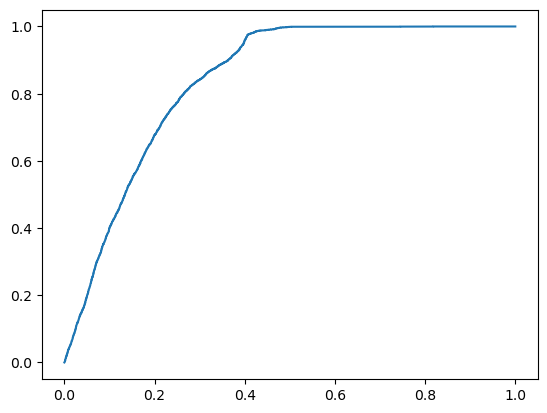

In [98]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [99]:
param = [
    {
        'model':(LogisticRegression(),),
        'model__penalty' : ['l2', None],
        'model__C':[0.5,3]
    }
]

In [100]:
grid = GridSearchCV(estimator=model_pipeline,param_grid=param, cv=2, scoring='roc_auc')

In [101]:
grid.fit(train_X,train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('scale',
                                                                                          RobustScaler())]),
                                                                         ['Age',
                                                                          'Driving_License',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': (LogisticRegression(C=3),),
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [102]:
grid.best_params_

{'model': LogisticRegression(C=3), 'model__C': 3, 'model__penalty': 'l2'}

In [103]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=3), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836337,4
1,"{'model': LogisticRegression(C=3), 'model__C': 0.5, 'model__penalty': None}",0.836337,2
2,"{'model': LogisticRegression(C=3), 'model__C': 3, 'model__penalty': 'l2'}",0.836337,1
3,"{'model': LogisticRegression(C=3), 'model__C': 3, 'model__penalty': None}",0.836337,2


In [104]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [108]:
from imblearn.over_sampling import RandomOverSampler    
from sklearn.tree import DecisionTreeClassifier
over_sampling = RandomOverSampler()

In [106]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [107]:
train_y.value_counts()

Response
0           301071
1            41927
Name: count, dtype: int64

In [109]:
param_2 = [
    {
        'model':(LogisticRegression(),),
        'model__penalty' : ['l2', None],
        'model__C':[0.5,3]
    },
    {
        'model':[DecisionTreeClassifier()],
        'model__max_depth':[3,5]

    }
]

In [110]:
grid_2 = GridSearchCV(estimator=model_pipeline,param_grid=param_2, cv=2, scoring='roc_auc')

In [111]:
grid_2.fit(train_X_os,train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('scale',
                                                                                          RobustScaler())]),
                                                                         ['Age',
                                                                          'Driving_License',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': (LogisticRegression(),),
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier(max_depth=5)],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [112]:
grid_2.best_params_

{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}

In [113]:
grid_2.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [114]:
new_model = grid_2.best_estimator_

Train AUC
0.7912687625942432
Valid AUC
0.7955030488340398
Train cnf_matrix
[[202500  98571]
 [  3776  38151]]
Train cnf_matrix
[[22540 10788]
 [  408  4375]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    301071
           1       0.28      0.91      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.79      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Train cls rep
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     33328
           1       0.29      0.91      0.44      4783

    accuracy                           0.71     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.71      0.76     38111



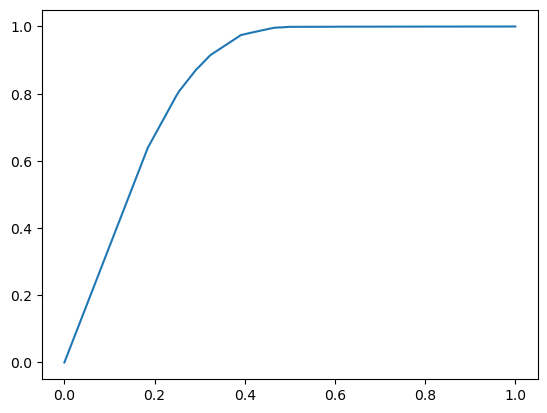

In [115]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

In [116]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836393,4
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836393,2
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836393,5
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836393,2
4,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 3}",0.816940,6
5,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}",0.837461,1


In [117]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [118]:
param_3 = [
    {
        'model':[LogisticRegression(),],
        'model__penalty' : ['l2', None],
        'model__C':[0.5,3]
    },
    {
        'model':[DecisionTreeClassifier()],
        'model__max_depth':[3,5]

    },
    {
        'model':[StackingClassifier(
            estimators =[
                ['sclf1', RandomForestClassifier()],
                ['sclf2', GradientBoostingClassifier()],
                ['sclf3', AdaBoostClassifier()],],
                final_estimator = LogisticRegression()
        )],
        'model__sclf1__max_depth':[4,8] ,
        'model__sclf2__n_estimators':[15,25] ,
        'model__sclf3__n_estimators':[5,35] ,
    }
]

In [119]:
grid_3 = GridSearchCV(estimator=model_pipeline,param_grid=param_3, cv=2, scoring='roc_auc')

In [ ]:
grid_3.fit(train_X_os,train_y_os)